In [29]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
#starting some initial exploration

#read in CSV
hr_df = pd.read_csv("./hr_stats.csv")

#review DF
hr_df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


In [9]:
#find out what is in the columns

print(hr_df.info())

print(hr_df.describe())

print(hr_df.describe(include = ['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

Summary:
* 200 total entries, each line is a unique employee
* 5 departments
* 6 positions



In [10]:
# dropping columns to make more usable 

hr_df.drop(hr_df.columns[[1,5,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,33,39,40,41,42,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]], axis=1, inplace=True)

In [11]:
le = LabelEncoder()
hr_df['gender_binary'] = le.fit_transform(hr_df['Gender'])
hr_df['dept_no'] = le.fit_transform(hr_df['Department'])
hr_df['position_no'] = le.fit_transform(hr_df['Role'])

hr_df.head()

hr_df.to_csv('cleaned_hr.csv')

In [19]:
ML_df = hr_df.drop(columns=["Gender", "Department", "Role", "ID", "gender_binary"])
ML_df.dtypes

GEO                       object
Will_Relocate              int64
Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
sales                     object
salary                    object
LinkedIn_Hits              int64
Emp_Identity               int64
Emp_Role                   int64
Emp_Position               int64
Emp_Title                  int64
dept_no                    int64
position_no                int64
dtype: object

In [23]:
ML_df["salary"].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [26]:
dummies_df = pd.get_dummies(ML_df)
# dummies_df = dummies_df.drop(columns=["GEO", "sales", "salary"])
dummies_df.dtypes

Will_Relocate              int64
Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
LinkedIn_Hits              int64
Emp_Identity               int64
Emp_Role                   int64
Emp_Position               int64
Emp_Title                  int64
dept_no                    int64
position_no                int64
GEO_Australia               bool
GEO_China                   bool
GEO_Colombia                bool
GEO_France                  bool
GEO_Japan                   bool
GEO_Korea                   bool
GEO_Turkey                  bool
GEO_UK                      bool
GEO_US                      bool
sales_IT                    bool
sales_RandD                 bool
sales_accounting            bool
sales_hr                    bool
sales_management            bool
sales_mark

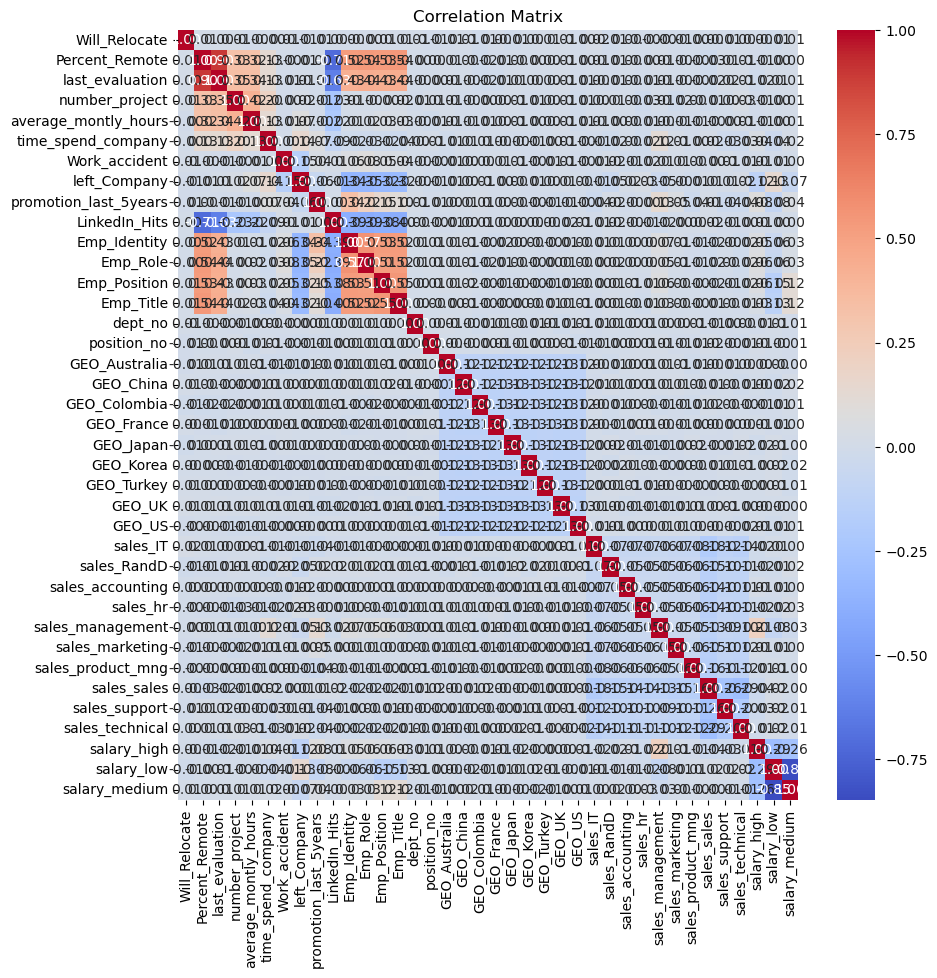

In [28]:
#correlation heatmap

# Correlation matrix
corr = dummies_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [31]:
X = dummies_df.drop(columns=["left_Company"])
y = dummies_df["left_Company"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_prediction = rf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2868
           1       0.99      0.96      0.98       882

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750

